<a href="https://colab.research.google.com/github/AndresMontesDeOca/Deep_Credit_Risk/blob/main/Deep_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import warnings; warnings.simplefilter('ignore')
from dcr import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size':16})

In [9]:
print(data.info())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN


In [14]:
data2 = data[['id','time','gdp_time','FICO_orig_time','LTV_time']]

In [17]:
np.round(data2.head(), 2)

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4,25,2.90,587,33.91
1,4,26,2.15,587,34.01
2,4,27,2.36,587,34.34
3,4,28,1.23,587,34.67
4,4,29,1.69,587,34.95


In [28]:
data.orig_time.describe()

,orig_time
count,62178.000000
mean,20.688218
std,7.377185
min,-40.000000
25%,18.000000
50%,22.000000
75%,25.000000
max,60.000000


In [36]:
table = pd.crosstab(data.time, columns=['kk'], margins=True)
table

col_0,kk,All
time,,
1,21,21
2,51,51
3,96,96
4,92,92
5,93,93
...,...,...
57,894,894
58,875,875
59,854,854


In [39]:
data3 = data2.reset_index(drop=True)

data3

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4,25,2.899137,587,33.911009
1,4,26,2.151365,587,34.007232
2,4,27,2.361722,587,34.335349
3,4,28,1.229172,587,34.672545
4,4,29,1.692969,587,34.951639
...,...,...,...,...,...
62173,49972,52,1.081049,708,103.306966
62174,49972,53,0.892996,708,95.736862
62175,49972,54,1.507359,708,91.867079
62176,49972,55,2.422275,708,91.560581


In [40]:
data2.head()

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4,25,2.899137,587,33.911009
1,4,26,2.151365,587,34.007232
2,4,27,2.361722,587,34.335349
3,4,28,1.229172,587,34.672545
4,4,29,1.692969,587,34.951639


In [51]:
data2.groupby('id')['FICO_orig_time'].agg(['count', 'mean']).reset_index()

,id,count,mean
0,4,35,587.0
1,9,13,501.0
2,13,3,635.0
3,35,6,584.0
4,37,3,656.0
...,...,...,...
4995,49949,9,619.0
4996,49952,9,537.0
4997,49956,9,620.0
4998,49971,9,654.0


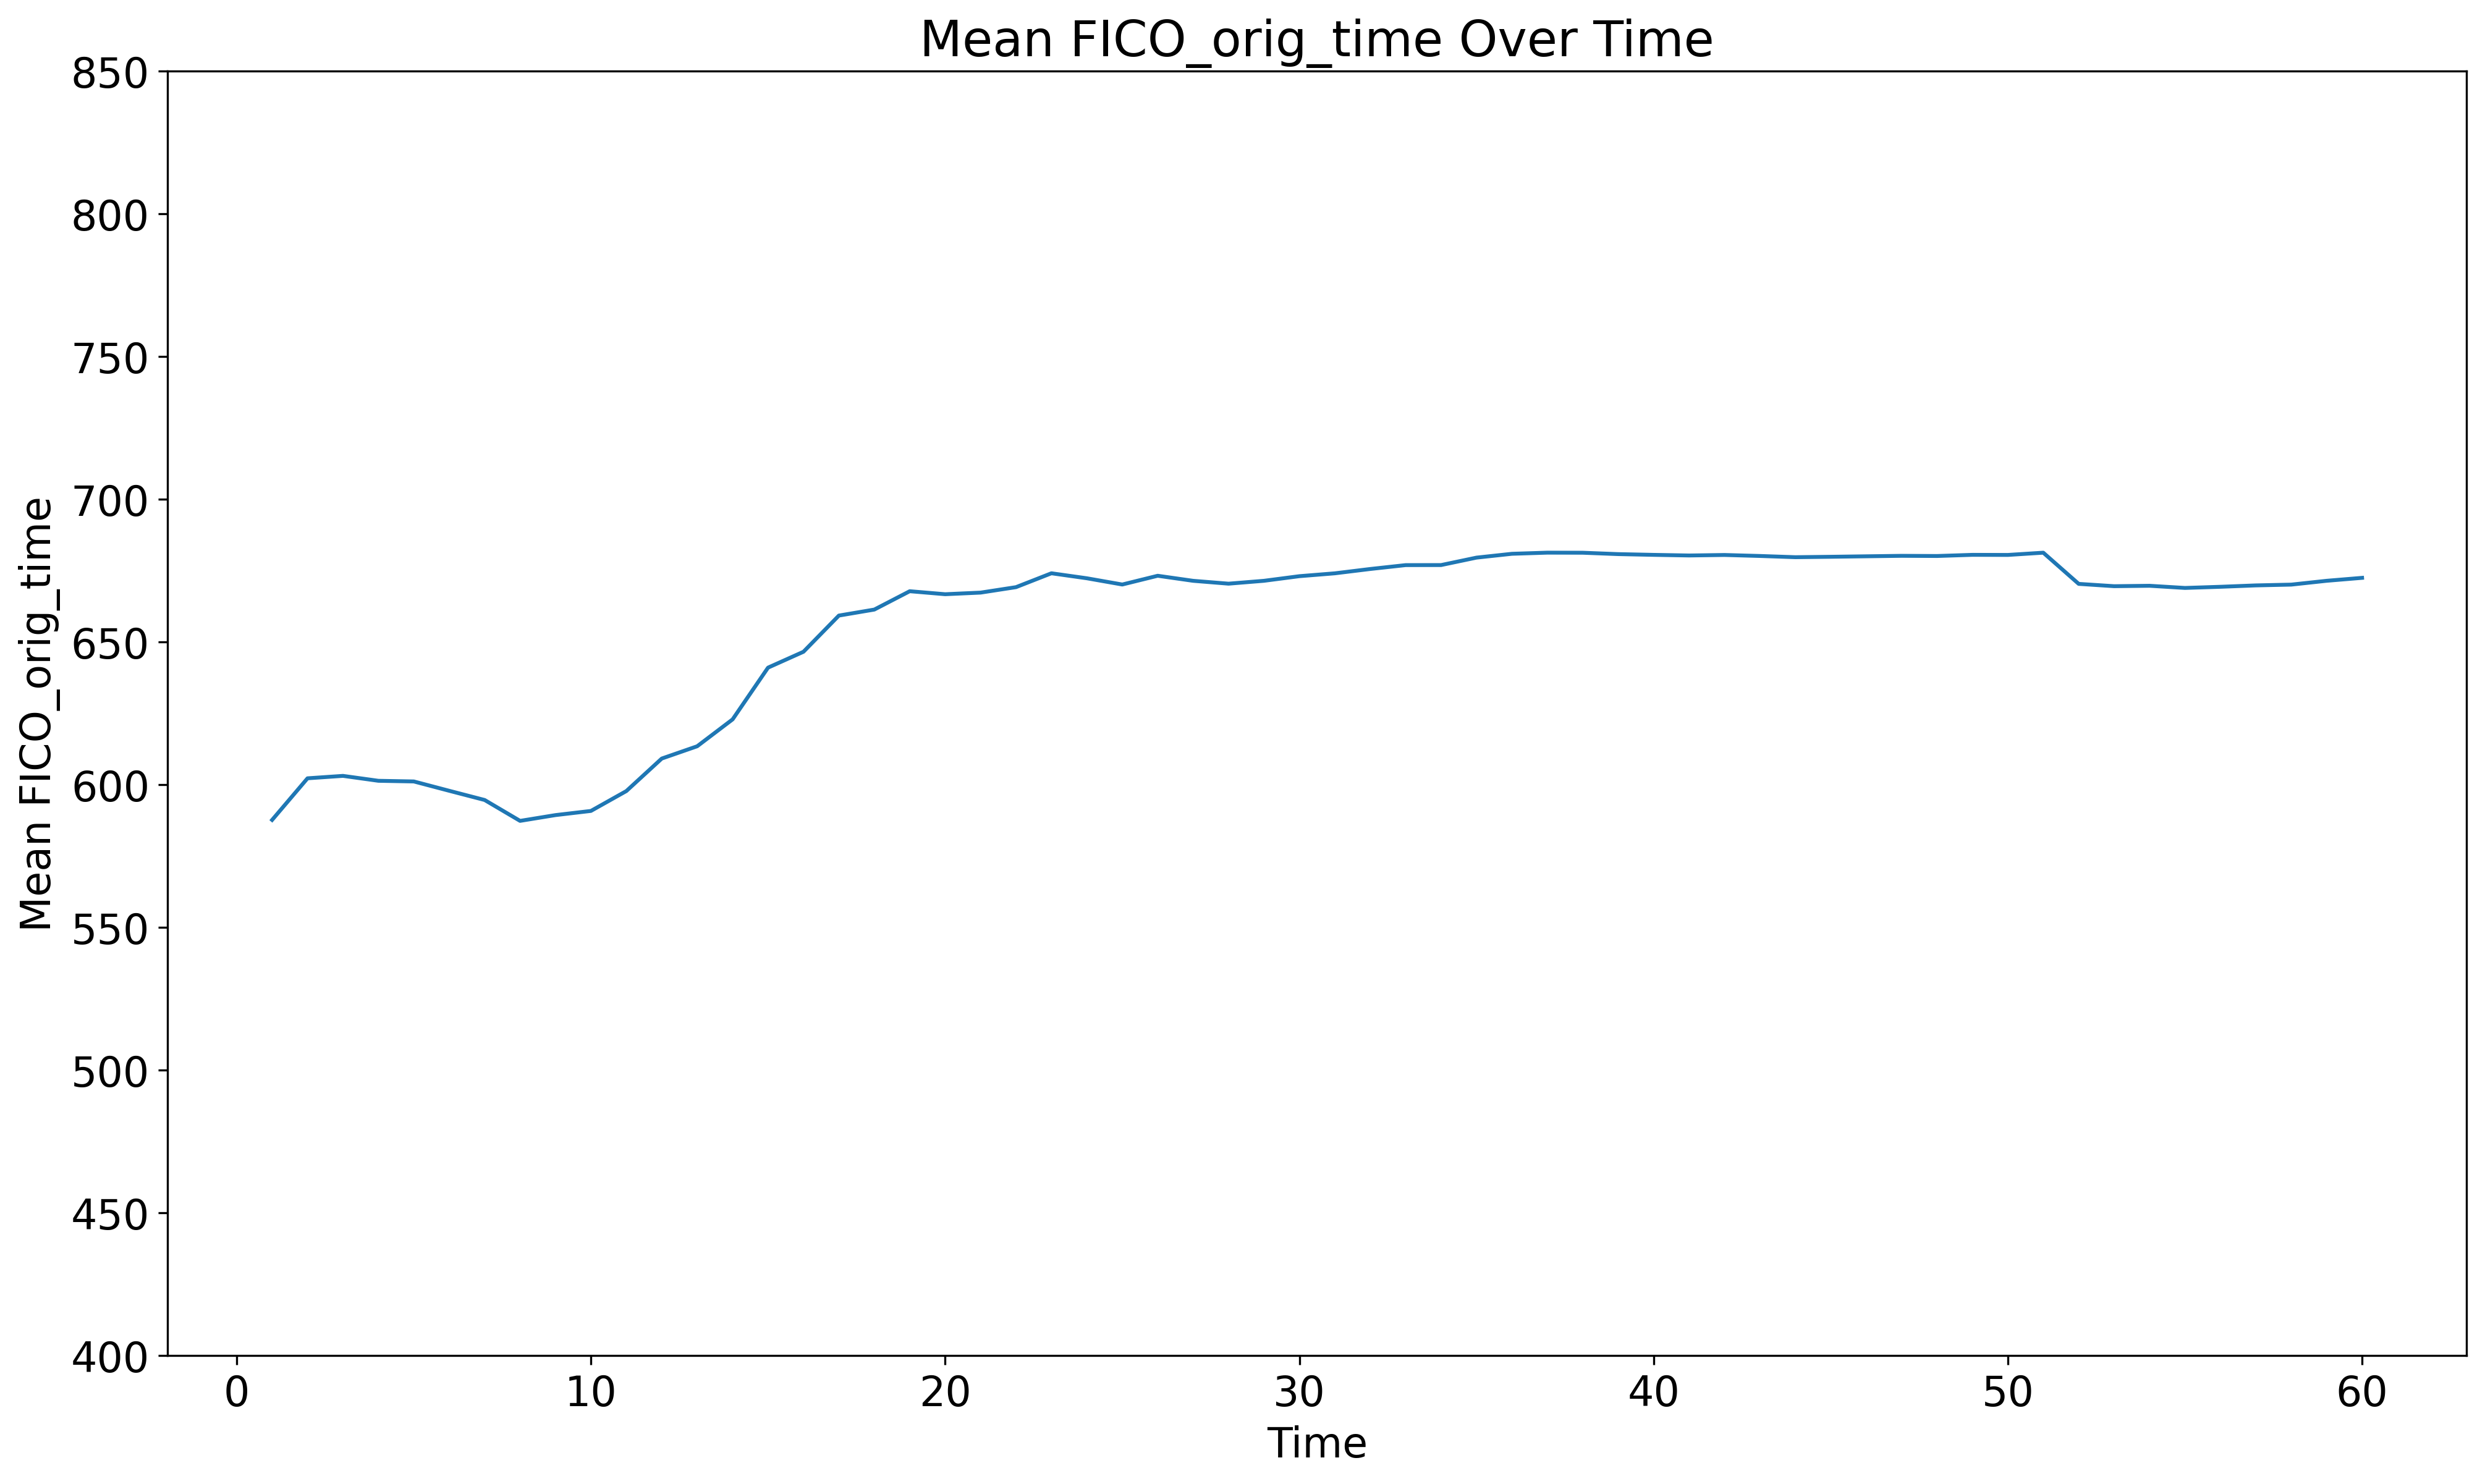

In [57]:
mean_fico_over_time = data.groupby('time')['FICO_orig_time'].mean()

mean_fico_over_time.plot(kind='line')
plt.title('Mean FICO_orig_time Over Time')
plt.xlabel('Time')
plt.ylabel('Mean FICO_orig_time')
plt.ylim([400, 850])
plt.show()

In [70]:
data.loc[data['FICO_orig_time'] > 700, 'dummy'] = 1
data.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,dummy
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,NaN


In [64]:
filter = data.query('FICO_orig_time > 700').index

index

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
51,20442,59,59,59,177,NaN,612807.92,79.585444,4.625,2.17,...,775,80.0,4.625,CA,187.65,0,0,0,NaN,NaN
52,20442,60,59,59,177,NaN,609509.45,78.252157,4.625,2.17,...,775,80.0,4.625,CA,187.65,0,0,0,NaN,NaN
53,20443,59,59,59,177,NaN,630392.94,74.602715,4.500,2.17,...,801,75.0,4.500,AL,187.65,0,0,0,NaN,NaN
54,20443,60,59,59,177,NaN,627841.96,73.451425,4.500,2.17,...,801,75.0,4.500,AL,187.65,0,0,0,NaN,NaN
55,20444,59,59,59,177,NaN,691646.41,79.682766,4.500,2.17,...,808,80.0,4.500,NJ,187.65,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62173,49972,52,25,52,145,NaN,180673.24,103.306966,7.500,5.15,...,708,79.8,7.500,AL,226.29,0,0,0,NaN,NaN
62174,49972,53,25,52,145,NaN,179944.95,95.736862,7.500,5.15,...,708,79.8,7.500,AL,226.29,0,0,0,NaN,NaN
62175,49972,54,25,52,145,NaN,179451.81,91.867079,7.500,5.15,...,708,79.8,7.500,AL,226.29,0,0,0,NaN,NaN
62176,49972,55,25,52,145,NaN,178952.48,91.560581,7.500,5.15,...,708,79.8,7.500,AL,226.29,0,0,0,NaN,NaN


In [74]:
data.drop(columns=['dummy'], inplace=True)